In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("SSK4604_combinedPutraBLASTAssessment.csv")
data

,InstructorID,Semester,Group,test1,Continuous,Projek,Final,Total,Grade,Fr_File,Fr_Forum
0,P1,S1-1819,K1,16.500000,18.400000,17.700000,8.0,60.6,B-,21,2
1,P1,S1-1819,K1,13.000000,14.100000,9.900000,15.0,52.0,C,19,3
2,P1,S1-1819,K1,13.000000,18.400000,17.700000,7.0,56.1,C+,24,5
3,P1,S1-1819,K1,6.000000,11.400000,15.500000,29.5,62.4,B-,54,18
4,P1,S1-1819,K1,14.000000,11.400000,15.500000,14.0,54.9,C+,33,16
...,...,...,...,...,...,...,...,...,...,...,...
64,P1,S1-20192020,K1,9.000000,14.266667,26.666667,17.5,67.4,B,5,74
65,P1,S1-20192020,K1,15.000000,14.733333,26.666667,17.5,73.9,B+,11,67
66,P1,S1-20192020,K1,16.506667,13.000000,26.666667,18.5,74.7,B+,5,23
67,P1,S1-20192020,K1,9.506667,14.733333,26.666667,21.5,72.4,B+,1,23


Now, we only want to extract numeric data only for correlation analysis. select_dtypes is use to select specific data type, object type is use to select string type data. Therefore, exclude is used to eliminate the object type.

In [0]:
numeric_data = data.select_dtypes(exclude=['object'])
numeric_data

,test1,Continuous,Projek,Final,Total,Fr_File,Fr_Forum
0,16.500000,18.400000,17.700000,8.0,60.6,21,2
1,13.000000,14.100000,9.900000,15.0,52.0,19,3
2,13.000000,18.400000,17.700000,7.0,56.1,24,5
3,6.000000,11.400000,15.500000,29.5,62.4,54,18
4,14.000000,11.400000,15.500000,14.0,54.9,33,16
...,...,...,...,...,...,...,...
64,9.000000,14.266667,26.666667,17.5,67.4,5,74
65,15.000000,14.733333,26.666667,17.5,73.9,11,67
66,16.506667,13.000000,26.666667,18.5,74.7,5,23
67,9.506667,14.733333,26.666667,21.5,72.4,1,23


Next, we need to inspect any column with missing data values.

In [0]:
columns_with_missing = [col for col in numeric_data.columns if numeric_data[col].isnull().any()]
len(columns_with_missing)

0

In [0]:
number_NaN = numeric_data.isna().sum()
number_NaN

test1         0
Continuous    0
Projek        0
Final         0
Total         0
Fr_File       0
Fr_Forum      0
dtype: int64

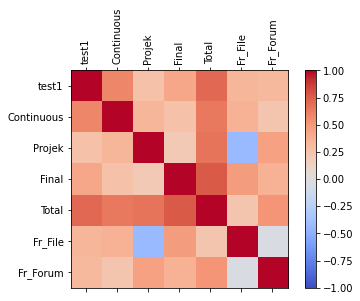

In [0]:
corr = numeric_data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(numeric_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)

ax.set_yticks(ticks)
ax.set_xticklabels(numeric_data.columns)
ax.set_yticklabels(numeric_data.columns)

plt.show()

In [0]:
corr

,test1,Continuous,Projek,Final,Total,Fr_File,Fr_Forum
test1,1.000000,0.584994,0.268781,0.429298,0.715463,0.337374,0.322261
Continuous,0.584994,1.000000,0.336712,0.271454,0.644096,0.370043,0.235949
Projek,0.268781,0.336712,1.000000,0.207814,0.667060,-0.423476,0.456448
Final,0.429298,0.271454,0.207814,1.000000,0.772796,0.479378,0.371946
Total,0.715463,0.644096,0.667060,0.772796,1.000000,0.235983,0.516602
Fr_File,0.337374,0.370043,-0.423476,0.479378,0.235983,1.000000,-0.032770
Fr_Forum,0.322261,0.235949,0.456448,0.371946,0.516602,-0.032770,1.000000
